In [2]:
%matplotlib inline

/Users/viveksck/Envs/Env1/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
import pylab as pl
import numpy as np
import seaborn as sns
from scipy.optimize import curve_fit

In [4]:
from scipy.stats import poisson

In [5]:
import pandas as pd

In [6]:
df = pd.read_csv('../viveksck/Downloads/45_list.csv', header=None)

In [7]:
X = df.values

In [8]:
C=np.cumsum(X, axis=1)

In [9]:
def gompertz(t, N0, K, r, T):
    return K * np.exp(-T * np.exp(-r * t))

In [10]:
NOE =[]
KE =[]
RE = []
TE = []
for i in np.arange(0, 10000):
    np.random.shuffle(C)
    N = np.mean(C[:100], axis=0)
    t = np.arange(0,45)
    popt, cov = curve_fit(gompertz, t, N, (N.min(), N.max(), 1, 2))
    N0, K, r, T = popt
    Nhat = gompertz(t, N0, K, r, T)
    NOE.append(N0)
    KE.append(K)
    RE.append(r)
    TE.append(T)

/Users/viveksck/Envs/Env1/lib/python2.7/site-packages/scipy/optimize/minpack.py:690: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [11]:
NOEB = (np.min(NOE), np.max(NOE))
KEB = (np.min(KE), np.max(KE))
REB = (np.min(RE), np.max(RE))
TEB = (np.min(TE), np.max(TE))

In [12]:
LB = [NOEB[0], KEB[0], REB[0], TEB[0]]
UB = [NOEB[1], KEB[1], REB[1], TEB[1]]

In [64]:
t = np.arange(0,45)
N = C[1]
popt, cov = curve_fit(gompertz, t[:10], N[:10], (np.mean(NOE), np.mean(KE), np.mean(RE), np.mean(TE)), bounds=(LB, UB))
N0, K, r, T = popt

N0=1.489, K=302.037, r=0.069134, T=3.6431
('MSE:', 1420.0753633855602)


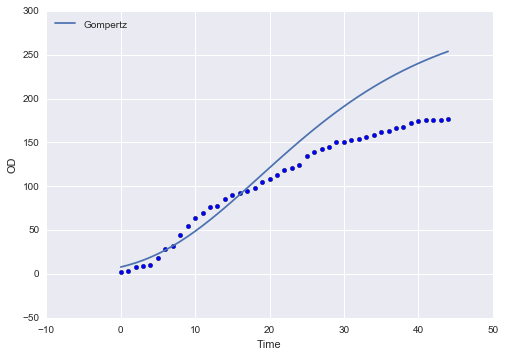

In [65]:
Nhat = gompertz(t, N0, K, r, T)
print('N0={0:.3f}, K={1:.3f}, r={2:.6f}, T={3:.4f}'.format(N0, K, r, T))
print("MSE:", ((N - Nhat)**2).mean())
 
pl.scatter(t, N)
pl.plot(t, Nhat, label='Gompertz')
pl.xlabel('Time')
pl.ylabel('OD')
pl.legend(loc='upper left')
sns.despine();

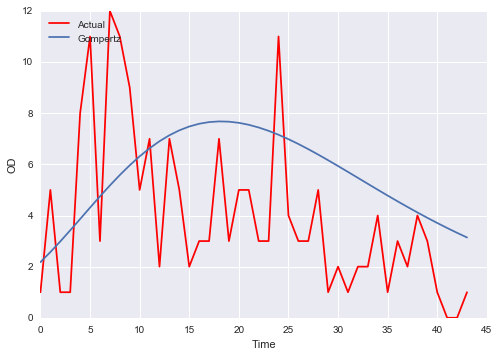

In [66]:
pl.plot(np.diff(N), label='Actual', color='r')
pl.plot(np.diff(Nhat), label='Gompertz')
pl.xlabel('Time')
pl.ylabel('OD')
pl.legend(loc='upper left')
sns.despine();